In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ML WOC/Data Sets/binary classification/binary_classification_train.csv'
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
feature_cols = [f"Feature_{i}" for i in range(1,21)]
# print(feature_cols)
X = data[feature_cols].to_numpy()
Y = data[['Class']].to_numpy()
indxs = np.random.permutation(Y.size)
X = X[indxs]
Y = Y[indxs]
x_train = X[:42000,:]
y_train = Y[:42000]
x_test = X[42000:,:]
y_test = Y[42000:]
x_cols_mean = np.mean(x_train, axis = 0)
x_cols_std = np.std(x_train,axis = 0)
x_train = (x_train - x_cols_mean)/x_cols_std
x_test = (x_test - x_cols_mean)/x_cols_std
print(x_train.shape)
print(y_train.shape)

(42000, 20)
(42000, 1)


In [ ]:
w = np.zeros((1,20))
b = np.zeros((1,1))

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def compute_cost(x,y,w,b):
  m = x.shape[0]
  predictions = sigmoid(np.dot(x,w.T) + b)
  cost = -np.mean(y*np.log(predictions) + (1-y)*np.log(1-predictions))
  return cost

In [ ]:
def compute_gradient(x,y,w,b):
  dj_dw = np.zeros_like(w)
  dj_db = np.zeros_like(b)
  predictions = sigmoid(np.dot(x,w.T) + b)
  err = predictions - y
  dj_dw = np.mean(err * x)
  dj_db = np.mean(err)
  return dj_dw,dj_db

In [ ]:
def gradient_descent(x,y,w,b,cost_func, grad_func,alpha, num_of_iters):
  J_history = []
  for i in range(num_of_iters):
    dj_dw, dj_db = grad_func(x,y,w,b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    J_history.append(cost_func(x,y,w,b))
    if i % ((num_of_iters + 9) // 10) == 0:
      print(f"Iteration: {i:4d}, Cost {cost_func(x,y,w,b)}, w:{w}, b={b}")
  return w,b,J_history

Iteration:    0, Cost 0.6921123797050004, w:[[0.00027252 0.00027252 0.00027252 0.00027252 0.00027252 0.00027252
  0.00027252 0.00027252 0.00027252 0.00027252 0.00027252 0.00027252
  0.00027252 0.00027252 0.00027252 0.00027252 0.00027252 0.00027252
  0.00027252 0.00027252]], b=[[-0.0054475]]
Iteration: 1000, Cost 0.6216303301809758, w:[[0.04442332 0.04442332 0.04442332 0.04442332 0.04442332 0.04442332
  0.04442332 0.04442332 0.04442332 0.04442332 0.04442332 0.04442332
  0.04442332 0.04442332 0.04442332 0.04442332 0.04442332 0.04442332
  0.04442332 0.04442332]], b=[[-0.76655782]]
Iteration: 2000, Cost 0.6216300897314548, w:[[0.04463032 0.04463032 0.04463032 0.04463032 0.04463032 0.04463032
  0.04463032 0.04463032 0.04463032 0.04463032 0.04463032 0.04463032
  0.04463032 0.04463032 0.04463032 0.04463032 0.04463032 0.04463032
  0.04463032 0.04463032]], b=[[-0.76781249]]
Iteration: 3000, Cost 0.6216300897294962, w:[[0.04463108 0.04463108 0.04463108 0.04463108 0.04463108 0.04463108
  0.044631

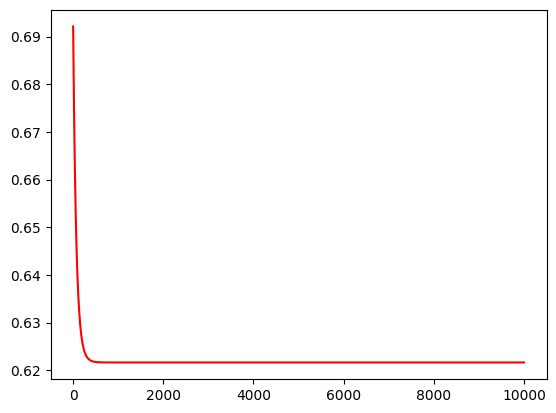

In [ ]:
alpha = 3e-2
num_of_iters = 10000
w_wo_reg, b_wo_reg, J_history_wo_reg = gradient_descent(x_train,y_train,w,b,compute_cost,compute_gradient,alpha,num_of_iters)
print(w_wo_reg)
print(b_wo_reg)
plt.plot(np.arange(1,num_of_iters+1), J_history_wo_reg, color='red')

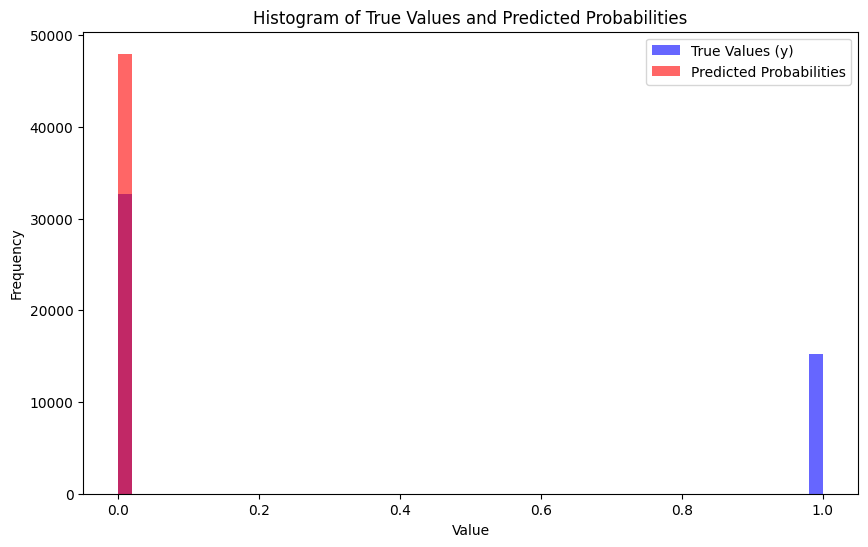

In [ ]:

predicted_probs = sigmoid(np.dot(x_train, w_wo_reg.T) + b_wo_reg)
for i in range(len(predicted_probs)):
  if predicted_probs[i] >= 0.5:
    predicted_probs[i] = 1
  else:
    predicted_probs[i] = 0
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=50, alpha=0.6, label='True Values (y)', color='blue')
plt.hist(predicted_probs, bins=50, alpha=0.6, label='Predicted Probabilities', color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of True Values and Predicted Probabilities')
plt.legend(loc='best')
plt.show()

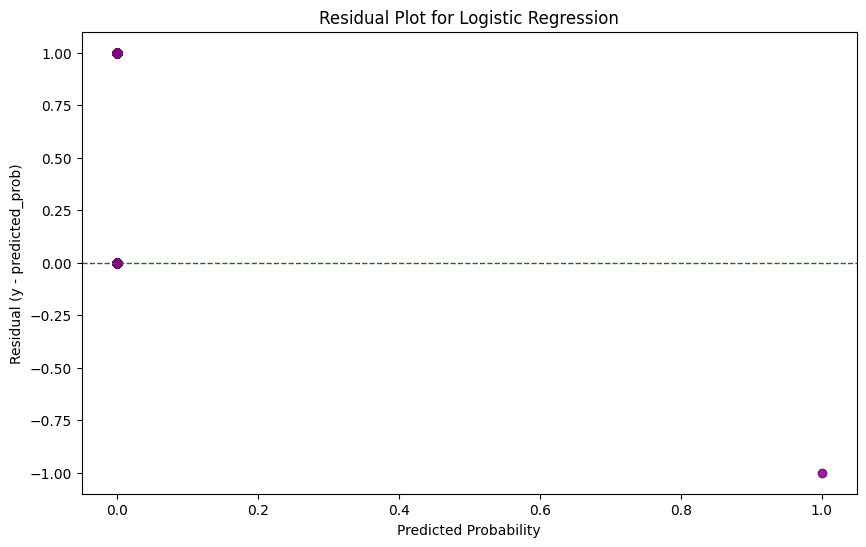

In [ ]:
# Residual plot:
residuals = y_train - predicted_probs
plt.figure(figsize=(10, 6))
plt.scatter(predicted_probs, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='green', linestyle='--', linewidth=1)
plt.xlabel('Predicted Probability')
plt.ylabel('Residual (y - predicted_prob)')
plt.title('Residual Plot for Logistic Regression')
plt.show()

In [ ]:
wrongs = 0
for i in range(len(predicted_probs)):
  if(predicted_probs[i] != y_train[i]):
    wrongs += 1
print(wrongs)

15286


In [ ]:
def compute_cost_reg(x,y,w,b,reg_param):
  m = x.shape[0]
  predictions = sigmoid(np.dot(x,w.T) + b)
  cost = -np.mean(y*np.log(predictions) + (1-y)*np.log(1-predictions))
  reg_cost = (reg_param * np.mean(w**2))/2
  return cost + reg_cost

In [ ]:
def gradient_descent_reg(x,y,w,b,cost_func, grad_func,alpha, num_of_iters,reg_param):
  J_history = []
  m = x.shape[0]
  for i in range(num_of_iters):
    dj_dw, dj_db = grad_func(x,y,w,b)
    w = w*(1-alpha*reg_param/m) - alpha*dj_dw
    b = b - alpha*dj_db
    J_history.append(cost_func(x,y,w,b,reg_param))
    if i % ((num_of_iters + 9) // 10) == 0:
      print(f"Iteration: {i:4d}, Cost {cost_func(x,y,w,b,reg_param)}, w:{w}, b={b}")
  return w,b,J_history

Iteration:    0, Cost 0.692112383418272, w:[[0.00027252 0.00027252 0.00027252 0.00027252 0.00027252 0.00027252
  0.00027252 0.00027252 0.00027252 0.00027252 0.00027252 0.00027252
  0.00027252 0.00027252 0.00027252 0.00027252 0.00027252 0.00027252
  0.00027252 0.00027252]], b=[[-0.0054475]]
Iteration: 1000, Cost 0.6217290001059519, w:[[0.04442287 0.04442287 0.04442287 0.04442287 0.04442287 0.04442287
  0.04442287 0.04442287 0.04442287 0.04442287 0.04442287 0.04442287
  0.04442287 0.04442287 0.04442287 0.04442287 0.04442287 0.04442287
  0.04442287 0.04442287]], b=[[-0.76655769]]
Iteration: 2000, Cost 0.6217296809562384, w:[[0.04462986 0.04462986 0.04462986 0.04462986 0.04462986 0.04462986
  0.04462986 0.04462986 0.04462986 0.04462986 0.04462986 0.04462986
  0.04462986 0.04462986 0.04462986 0.04462986 0.04462986 0.04462986
  0.04462986 0.04462986]], b=[[-0.76781235]]
Iteration: 3000, Cost 0.6217296843471887, w:[[0.04463062 0.04463062 0.04463062 0.04463062 0.04463062 0.04463062
  0.0446306

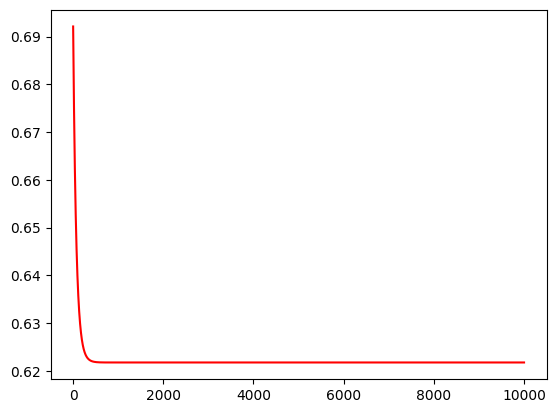

In [ ]:
alpha = 3e-2
num_of_iters = 10000
reg_param =0.1
w_w_reg, b_w_reg, J_history_w_reg = gradient_descent_reg(x_train,y_train,w,b,compute_cost_reg,compute_gradient,alpha,num_of_iters, reg_param)
print(w_w_reg)
print(b_w_reg)
plt.plot(np.arange(1,num_of_iters+1), J_history_w_reg, color='red')

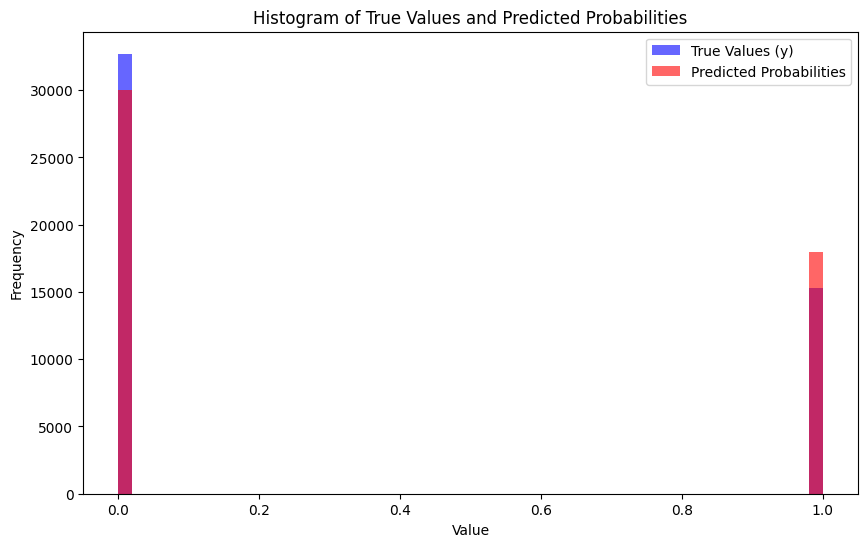

19975


In [ ]:
predicted_probs = sigmoid(np.dot(x_train, w_w_reg.T) + b_w_reg)
for i in range(len(predicted_probs)):
  if predicted_probs[i] >= 0.33:
    predicted_probs[i] = 1
  else:
    predicted_probs[i] = 0
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=50, alpha=0.6, label='True Values (y)', color='blue')
plt.hist(predicted_probs, bins=50, alpha=0.6, label='Predicted Probabilities', color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of True Values and Predicted Probabilities')
plt.legend(loc='best')
plt.show()
wrongs = 0
for i in range(len(predicted_probs)):
  if(predicted_probs[i] != y_train[i]):
    wrongs += 1
print(wrongs)

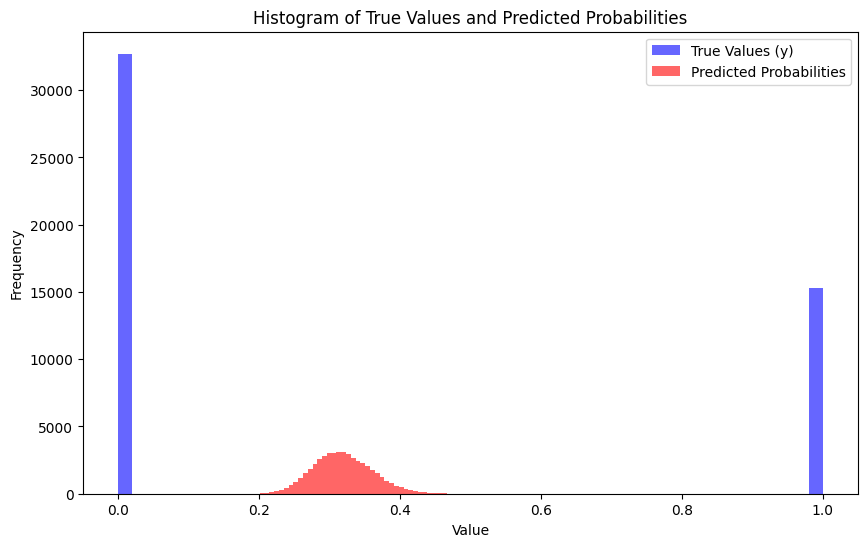

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=50, alpha=0.6, label='True Values (y)', color='blue')
plt.hist(sigmoid(np.dot(x_train, w_wo_reg.T) + b_wo_reg), bins=50, alpha=0.6, label='Predicted Probabilities', color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of True Values and Predicted Probabilities')
plt.legend(loc='best')
plt.show()

In [ ]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install gdown
import gdown
import pandas as pd

file_id = "1f0BhBf5w1TNkn1w26AF1B50s3vRCyAjl"
url = f"https://drive.google.com/uc?id={file_id}"
output_file = "test.csv"

gdown.download(url, output_file, quiet=False)

data = pd.read_csv(output_file)
print(data.head())

Downloading...
From: https://drive.google.com/uc?id=1f0BhBf5w1TNkn1w26AF1B50s3vRCyAjl
To: /content/test.csv
100%|██████████| 24.0M/24.0M [00:00<00:00, 54.9MB/s]


   ID  Feature_1  Feature_2  Feature_3   Feature_4  Feature_5  Feature_6  \
0   1 -10.429837  21.684251  93.056324  128.914740   1.657315 -34.602633   
1   2  12.475081  11.652011 -47.621889  -21.892583 -25.844861 -46.951253   
2   3   7.696188  24.729547  43.782383  -53.282523 -69.145794 -57.072335   
3   4   6.505033  22.092605 -25.161422    4.742729 -20.344550 -50.248793   
4   5   5.906445  19.909180  24.705865  -51.875251 -24.857500 -25.879977   

    Feature_7   Feature_8   Feature_9  ...  Feature_17  Feature_18  \
0  -70.314374  -89.585318  -98.465642  ...  -99.322780   19.560135   
1 -114.500805  -96.257473 -138.354981  ...  -89.763107   -8.250307   
2 -114.149171 -105.408739  -71.892560  ...   -3.859655  -17.301240   
3  -89.324731 -104.002016 -160.103875  ...   48.557507   -1.997502   
4  -37.787560  -99.587673  -47.929647  ...    3.556973  -26.643253   

   Feature_19  Feature_20  Feature_21  Feature_22  Feature_23  Feature_24  \
0   25.568291  -40.876179 -116.146068  -82.18

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LogisticRegression:
    def __init__(self,inp_features, alpha=1e-3, reg_param=None, batch_size=32,epochs=100):
        self.epochs = epochs
        self.inp_features = inp_features
        self.alpha = alpha
        self.reg_param = reg_param
        self.W = None
        self.B = None
        self._init_params()
        self.batch_size = batch_size
        self.thresh = 0.5
    def _init_params(self):
        self.W = np.random.randn(1,self.inp_features)
        self.B = 0.0
    def _compute_cost(self, X,Y):
        m = Y.size
        cost = -(1/m)*np.sum(Y*np.log(self.predict_fwb(X)))
        return cost
    def _add_reg_term(self,m):
        reg_cost = np.sum(self.W**2)
        reg_cost = (reg_cost*self.reg_param)/(2*m)
        return reg_cost
    def _get_grads(self,X,Y):
        predictions = self.predict_fwb(X)
        err = predictions - Y
        dj_dw = np.mean(np.multiply(err, X), axis=0)
        dj_db = np.mean(err)
        return dj_dw, dj_db
    def train(self, X, Y, details=False,plot_costs=True,get_report=True,print_con_mat=True):
        m = Y.size
        Y = Y.reshape((m,1))
        J_history_batches = []
        J_hist_ep = []
        for epoch in range(1, self.epochs+1):
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation,:]
            Y_shuffled = Y[permutation,:]
            batches = m //self.batch_size
            for k in range(batches):
                mini_batch_X = X_shuffled[k*self.batch_size:(k+1)*self.batch_size,:]
                mini_batch_Y = Y_shuffled[k*self.batch_size: (k+1)*self.batch_size,:]
                dj_dw, dj_db = self._get_grads(mini_batch_X, mini_batch_Y)
                if self.reg_param is None:
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                else:
                  self.W = self.W*(1-self.alpha*self.reg_param/m)
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                cost = self._compute_cost(mini_batch_X, mini_batch_Y)
                J_history_batches.append(cost)
                cost += self._add_reg_term(mini_batch_Y.size) if self.reg_param is not None else 0
                if details:
                    print(f"Epoch: {epoch:03d}, Batch: {k+1}/{batches}, Cost: {cost:.6f}")

            if m%batches != 0:
                mini_batch_X = X_shuffled[batches*self.batch_size:,:]
                mini_batch_Y = Y_shuffled[batches*self.batch_size]
                dj_dw, dj_db = self._get_grads(mini_batch_X, mini_batch_Y)
                if self.reg_param is None:
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                else:
                  self.W = self.W*(1-self.alpha*self.reg_param/m)
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db

                cost = self._compute_cost(mini_batch_X, mini_batch_Y)
                J_history_batches.append(cost)
                cost += self._add_reg_term(mini_batch_Y.size) if self.reg_param is not None else 0
                if details:
                    print(f"Epoch: {epoch:03d}, Batch: last, Cost: {cost:.6f}")

            cost = self._compute_cost(X_shuffled, Y_shuffled)
            J_hist_ep.append(cost)
            cost += self._add_reg_term(m) if self.reg_param is not None else 0
            print(f"Epoch: {epoch:03d}, Cost: {cost:.6f}, Accuracy: {self.get_accuracy(Y_shuffled, self.predict(X_shuffled)):.4f}")

        if print_con_mat:
            predictions = self.predict(X)
            con_mat = self.get_conf_mat(Y, predictions)
            self.print_con_mat(con_mat)
        if get_report:
            predictions = self.predict(X)
            self.classification_report(Y, predictions)
        self._plotter(J_hist_ep) if plot_costs else None
    def k_fold_cv(self, X, Y, k=5):
        pass
    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def predict_fwb(self, X):
        z =  np.dot(X,self.W.T) + self.B
        return self._sigmoid(z)
    def predict(self, X):
        predictions = self.predict_fwb(X)
        pred_final = (predictions >= self.thresh).astype(int)
        return pred_final
    def _plotter(self, J_hist):
        plt.plot(np.arange(1,len(J_hist)+1), J_hist, c='r')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title("Cost vs Epochs")
        plt.show()

    def get_conf_mat(self, Y_act, Y_pred):
        n_cls = len(np.unique(Y_act))
        con_mat = np.zeros((n_cls, n_cls))
        for indx, label in enumerate(Y_act):
            con_mat[label, Y_pred[indx]] += 1

        return con_mat

    def print_con_mat(self, con_mat):
        print("Confusion matrix with predictions on X axis and actual values on Y")
        classes= np.arange(con_mat.shape[0])
        table = pd.DataFrame(con_mat, index=classes, columns=classes)
        print(table)

    def get_precision(self,con_mat):
        precs = np.zeros((con_mat.shape[0],))
        for i in range(con_mat.shape[0]):
            precs[i] = con_mat[i,i]/np.sum(con_mat[:,i])

        return precs

    def get_recall(self, con_mat):
        recs = np.zeros((con_mat.shape[0],))
        for i in range(con_mat.shape[0]):
            recs[i] = con_mat[i,i]/np.sum(con_mat[i,:])

        return recs

    def get_f1s(self, con_mat):
        precs = self.get_precision(con_mat)
        recs = self.get_recall(con_mat)
        f1s = 2*recs*precs/(recs + precs)
        return f1s
    def get_accuracy(self, Y_act, Y_pred):
        return 100*np.mean(Y_act == Y_pred)
    def classification_report(self, Y_act, Y_pred):
        con_mat = self.get_conf_mat(Y_act, Y_pred)
        precs = self.get_precision(con_mat)
        recs = self.get_recall(con_mat)
        f1s = self.get_f1s(con_mat)
        supports = con_mat.sum(axis=1)
        classes= np.arange(con_mat.shape[0])
        reports = []
        for i in range(con_mat.shape[0]):
            reports.append([precs[i], recs[i], f1s[i], supports[i]])
        table1 = pd.DataFrame(reports,index=classes, columns=['precision','recall','f1-score','support'])
        # print(table1)
        wted_prec = np.average(precs, weights=supports)
        wted_rec = np.average(recs, weights=supports)
        wted_f1 = np.average(f1s, weights=supports)
        tot_support = np.sum(supports)
        wted_data = [[wted_prec,wted_rec,wted_f1,tot_support]]
        table2 = pd.DataFrame(wted_data,index=['Average (weighted)'],columns=['precision', 'recall', 'f1-score', 'support'])
        # print('\n\n', table2)
        table = pd.concat([table1, table2])
        print(table)
        print(f"Accuracy: {self.get_accuracy(Y_pred, Y_act)}%")

Epoch: 001, Cost: 0.324837, Accuracy: 63.6833
Epoch: 002, Cost: 0.271707, Accuracy: 68.7500
Epoch: 003, Cost: 0.237457, Accuracy: 73.0500
Epoch: 004, Cost: 0.214856, Accuracy: 76.8167
Epoch: 005, Cost: 0.199632, Accuracy: 79.8738
Epoch: 006, Cost: 0.189079, Accuracy: 82.2167
Epoch: 007, Cost: 0.181589, Accuracy: 84.1643
Epoch: 008, Cost: 0.176157, Accuracy: 85.7976
Epoch: 009, Cost: 0.171970, Accuracy: 87.0952
Epoch: 010, Cost: 0.168797, Accuracy: 88.0286
Epoch: 011, Cost: 0.166255, Accuracy: 88.8405
Epoch: 012, Cost: 0.164222, Accuracy: 89.5143
Epoch: 013, Cost: 0.162523, Accuracy: 90.0048
Epoch: 014, Cost: 0.161076, Accuracy: 90.4571
Epoch: 015, Cost: 0.159784, Accuracy: 90.8476
Epoch: 016, Cost: 0.158717, Accuracy: 91.1381
Epoch: 017, Cost: 0.157720, Accuracy: 91.4643
Epoch: 018, Cost: 0.156901, Accuracy: 91.7024
Epoch: 019, Cost: 0.156157, Accuracy: 91.8786
Epoch: 020, Cost: 0.155476, Accuracy: 92.0524
Epoch: 021, Cost: 0.154832, Accuracy: 92.2000
Epoch: 022, Cost: 0.154293, Accura

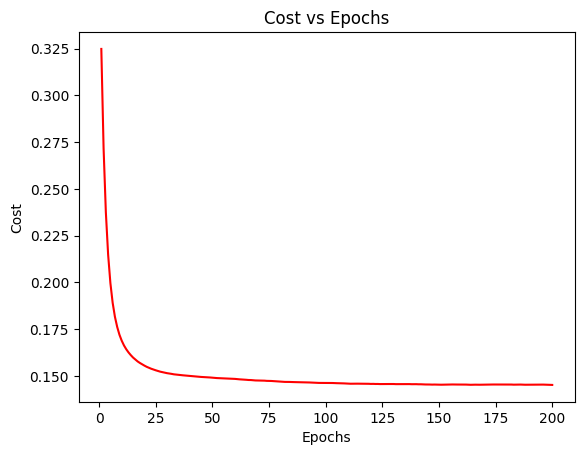

Confusion matrix with predictions on X axis and actual values on Y
        0       1
0  3975.0   119.0
1   279.0  1627.0
                    precision    recall  f1-score  support
0                    0.934415  0.970933  0.952324   4094.0
1                    0.931844  0.853620  0.891019   1906.0
Average (weighted)   0.933598  0.933667  0.932849   6000.0
Accuracy: 93.36666666666666%


In [ ]:
model = LogisticRegression(20,reg_param=3e-2,epochs=200)
model.train(x_train, y_train, details=False, plot_costs=True, get_report=True, print_con_mat=True)
# preds = model.predict(x_test)
# print(f"Testing accuracy: {model.get_accuracy(preds, y_test)}")
con_mat_test = model.get_conf_mat(y_test, model.predict(x_test))
model.print_con_mat(con_mat_test)
model.classification_report(y_test, model.predict(x_test))

In [ ]:
# Trying out different threshold values:
# thresh_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresh_list = [0.2,0.3,0.4,0.5,0.6]
thresh_list = [0.400,0.425,0.450,0.475,0.500]
for thresh in thresh_list:
  model.thresh = thresh
  print(f"\nThreshold: {thresh}")
  # print("Traning classification report: ")
  # model.classification_report(y_train, model.predict(x_train))
  # print("Testing classification report: ")
  # model.classification_report(y_test, model.predict(x_test))
  conf_matrx_train = model.get_conf_mat(y_train, model.predict(x_train))
  conf_matrx_test = model.get_conf_mat(y_test, model.predict(x_test))
  print(f"f1s for training: {model.get_f1s(conf_matrx_train)}")
  print(f"f1s for testing: {model.get_f1s(conf_matrx_test)}")

# After testing with other values of thresholds, I found that 0.45 is optimal choice


Threshold: 0.4
f1s for training: [0.95232647 0.89550084]
f1s for testing: [0.95217391 0.89354839]

Threshold: 0.425
f1s for training: [0.95302802 0.89612723]
f1s for testing: [0.95236947 0.89344483]

Threshold: 0.45
f1s for training: [0.95348797 0.89632904]
f1s for testing: [0.95254156 0.89345592]

Threshold: 0.475
f1s for training: [0.95336788 0.89543367]
f1s for testing: [0.95264423 0.89293478]

Threshold: 0.5
f1s for training: [0.95317921 0.89425091]
f1s for testing: [0.95232391 0.89101862]


In [ ]:
thresh = 0.45
model.thresh = thresh
print(f"\nThreshold: {thresh}")
print("Traning classification report: ")
model.classification_report(y_train, model.predict(x_train))
print("Testing classification report: ")
model.classification_report(y_test, model.predict(x_test))


Threshold: 0.45
Traning classification report: 
                    precision    recall  f1-score  support
0                    0.941457  0.965830  0.953488  28622.0
1                    0.922608  0.871505  0.896329  13378.0
Average (weighted)   0.935453  0.935786  0.935281  42000.0
Accuracy: 93.57857142857144%
Testing classification report: 
                    precision    recall  f1-score  support
0                    0.939639  0.965804  0.952542   4094.0
1                    0.921875  0.866737  0.893456   1906.0
Average (weighted)   0.933996  0.934333  0.933772   6000.0
Accuracy: 93.43333333333334%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LogisticRegression:
    def __init__(self,inp_features, alpha=1e-3, reg_param=None, batch_size=32,epochs=100):
        self.epochs = epochs
        self.inp_features = inp_features
        self.alpha = alpha
        self.reg_param = reg_param
        self.W = None
        self.B = None
        self._init_params()
        self.batch_size = batch_size
        self.thresh = 0.5
    def _init_params(self):
        self.W = np.random.randn(1,self.inp_features)
        self.B = 0.0
    def _compute_cost(self, X,Y):
        m = Y.size
        cost = -(1/m)*np.sum(Y*np.log(self.predict_fwb(X)))
        return cost
    def _add_reg_term(self,m):
        reg_cost = np.sum(self.W**2)
        reg_cost = (reg_cost*self.reg_param)/(2*m)
        return reg_cost
    def _get_grads(self,X,Y):
        predictions = self.predict_fwb(X)
        err = predictions - Y
        dj_dw = np.mean(np.multiply(err, X), axis=0)
        dj_db = np.mean(err)
        return dj_dw, dj_db
    def train(self, X, Y, details=False,plot_costs=True,get_report=True,print_con_mat=True):
        m = Y.size
        Y = Y.reshape((m,1))
        J_history_batches = []
        J_hist_ep = []
        for epoch in range(1, self.epochs+1):
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation,:]
            Y_shuffled = Y[permutation,:]
            batches = m //self.batch_size
            for k in range(batches):
                mini_batch_X = X_shuffled[k*self.batch_size:(k+1)*self.batch_size,:]
                mini_batch_Y = Y_shuffled[k*self.batch_size: (k+1)*self.batch_size,:]
                dj_dw, dj_db = self._get_grads(mini_batch_X, mini_batch_Y)
                if self.reg_param is None:
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                else:
                  self.W = self.W*(1-self.alpha*self.reg_param/m)
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                cost = self._compute_cost(mini_batch_X, mini_batch_Y)
                J_history_batches.append(cost)
                cost += self._add_reg_term(mini_batch_Y.size) if self.reg_param is not None else 0
                if details:
                    print(f"Epoch: {epoch:03d}, Batch: {k+1}/{batches}, Cost: {cost:.6f}")

            if m%batches != 0:
                mini_batch_X = X_shuffled[batches*self.batch_size:,:]
                mini_batch_Y = Y_shuffled[batches*self.batch_size]
                dj_dw, dj_db = self._get_grads(mini_batch_X, mini_batch_Y)
                if self.reg_param is None:
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                else:
                  self.W = self.W*(1-self.alpha*self.reg_param/m)
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db

                cost = self._compute_cost(mini_batch_X, mini_batch_Y)
                J_history_batches.append(cost)
                cost += self._add_reg_term(mini_batch_Y.size) if self.reg_param is not None else 0
                if details:
                    print(f"Epoch: {epoch:03d}, Batch: last, Cost: {cost:.6f}")

            cost = self._compute_cost(X_shuffled, Y_shuffled)
            J_hist_ep.append(cost)
            cost += self._add_reg_term(m) if self.reg_param is not None else 0
            print(f"Epoch: {epoch:03d}, Cost: {cost:.6f}, Accuracy: {self.get_accuracy(Y_shuffled, self.predict(X_shuffled)):.4f}")

        if print_con_mat:
            predictions = self.predict(X)
            con_mat = self.get_conf_mat(Y, predictions)
            self.print_con_mat(con_mat)
        if get_report:
            predictions = self.predict(X)
            self.classification_report(Y, predictions)
        self._plotter(J_hist_ep) if plot_costs else None
        return J_hist_ep
    def k_fold_cv(self, X, Y, k=5, details=False,plot_cost_vs_epoch=True, plot_cost_vs_acc=True,retrain=False):
        m = X.shape[0]
        indxs = np.random.permutation(m)
        X_shuffled = X[indxs,:]
        Y_shuffled = Y[indxs]
        testing_accs = []
        training_accs = []
        if plot_cost_vs_epoch:
            J_hist_list = []
        fold_size = m // k
        for fold in range(1,k+1):
            self._init_params()
            print(f"Working on fold {fold}....")
            test_start = (fold-1)*fold_size
            test_end = fold*fold_size if fold < k-1 else m
            X_train = np.concatenate((X_shuffled[:test_start,:], X_shuffled[test_end:,:]), axis=0)
            Y_train = np.concatenate((Y_shuffled[:test_start], Y_shuffled[test_end:]))
            X_test = X_shuffled[test_start:test_end,:]
            Y_test = Y_shuffled[test_start:test_end]
            X_train_mean = np.mean(X_train, axis=0)
            X_train_std = np.std(X_train, axis=0)
            X_train = (X_train - X_train_mean)/X_train_std
            X_test = (X_test - X_train_mean)/X_train_std
            J_hist_ep = self.train(X_train, Y_train,details=details,plot_costs=False,get_report=False,print_con_mat=False)
            print(f"Training Report for fold {fold}:")
            self.classification_report(Y_train, self.predict(X_train))
            J_hist_list.append(J_hist_ep)
            print(f"Testing report for fold {fold}: ")
            self.classification_report(Y_test, self.predict(X_test))
            test_acc = self.get_accuracy(Y_test, self.predict(X_test))
            train_acc = self.get_accuracy(Y_train, self.predict(X_train))
            testing_accs.append(test_acc)
            training_accs.append(train_acc)
            print(f"Fold {fold} completed!")
            print(f"Starting fold {fold +1}") if fold<k else None
        mean_test_acc = np.mean(testing_accs)
        mean_train_acc = np.mean(training_accs)
        print(f"Mean of training Accuracies is {mean_train_acc}")
        print(f"Mean of testing accuracies: {mean_test_acc}")
        if plot_cost_vs_epoch:
            for fold in range(1,k+1):
                plt.plot(np.arange(1,1+len(J_hist_list[fold-1])), J_hist_list[fold-1], c='r',label='Cost')
                plt.xlabel("Epochs")
                plt.ylabel("Costs")
                plt.title(f"Costs vs Epochs for fold {fold}")
                plt.legend()
                plt.show()

        if plot_cost_vs_acc:
            plt.plot(np.arange(1,k+1), training_accs, c='blue', label='Training Accuracies', linestyle='--', marker='o')
            plt.plot(np.arange(1,k+1), testing_accs, c='green', label='Testing Accuracies', linestyle='--', marker='o')
            plt.xlabel("Folds")
            plt.ylabel("Accuracies")
            plt.title("Folds vs Accuracies")
            plt.legend()
            plt.show()

        return mean_train_acc, mean_test_acc, training_accs, testing_accs
    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def predict_fwb(self, X):
        z =  np.dot(X,self.W.T) + self.B
        return self._sigmoid(z)
    def predict(self, X):
        predictions = self.predict_fwb(X)
        pred_final = (predictions >= self.thresh).astype(int)
        return pred_final
    def _plotter(self, J_hist):
        plt.plot(np.arange(1,len(J_hist)+1), J_hist, c='r')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title("Cost vs Epochs")
        plt.show()

    def get_conf_mat(self, Y_act, Y_pred):
        n_cls = len(np.unique(Y_act))
        con_mat = np.zeros((n_cls, n_cls))
        for indx, label in enumerate(Y_act):
            con_mat[label, Y_pred[indx]] += 1

        return con_mat

    def print_con_mat(self, con_mat):
        print("Confusion matrix with predictions on X axis and actual values on Y")
        classes= np.arange(con_mat.shape[0])
        table = pd.DataFrame(con_mat, index=classes, columns=classes)
        print(table)

    def get_precision(self,con_mat):
        precs = np.zeros((con_mat.shape[0],))
        for i in range(con_mat.shape[0]):
            precs[i] = con_mat[i,i]/np.sum(con_mat[:,i])

        return precs

    def get_recall(self, con_mat):
        recs = np.zeros((con_mat.shape[0],))
        for i in range(con_mat.shape[0]):
            recs[i] = con_mat[i,i]/np.sum(con_mat[i,:])

        return recs

    def get_f1s(self, con_mat):
        precs = self.get_precision(con_mat)
        recs = self.get_recall(con_mat)
        f1s = 2*recs*precs/(recs + precs)
        return f1s
    def get_accuracy(self, Y_act, Y_pred):
        return 100*np.mean(Y_act == Y_pred)
    def classification_report(self, Y_act, Y_pred):
        con_mat = self.get_conf_mat(Y_act, Y_pred)
        precs = self.get_precision(con_mat)
        recs = self.get_recall(con_mat)
        f1s = self.get_f1s(con_mat)
        supports = con_mat.sum(axis=1)
        classes= np.arange(con_mat.shape[0])
        reports = []
        for i in range(con_mat.shape[0]):
            reports.append([precs[i], recs[i], f1s[i], supports[i]])
        table1 = pd.DataFrame(reports,index=classes, columns=['precision','recall','f1-score','support'])
        # print(table1)
        wted_prec = np.average(precs, weights=supports)
        wted_rec = np.average(recs, weights=supports)
        wted_f1 = np.average(f1s, weights=supports)
        tot_support = np.sum(supports)
        wted_data = [[wted_prec,wted_rec,wted_f1,tot_support]]
        table2 = pd.DataFrame(wted_data,index=['Average (weighted)'],columns=['precision', 'recall', 'f1-score', 'support'])
        # print('\n\n', table2)
        table = pd.concat([table1, table2])
        print(table)
        print(f"Accuracy: {self.get_accuracy(Y_pred, Y_act)}%")

Epoch: 001, Cost: 0.248662, Accuracy: 70.9786
Epoch: 002, Cost: 0.184872, Accuracy: 81.0976
Epoch: 003, Cost: 0.170863, Accuracy: 86.5714
Epoch: 004, Cost: 0.165597, Accuracy: 89.3738
Epoch: 005, Cost: 0.162011, Accuracy: 90.9690
Epoch: 006, Cost: 0.159217, Accuracy: 91.9500
Epoch: 007, Cost: 0.157185, Accuracy: 92.5214
Epoch: 008, Cost: 0.155438, Accuracy: 92.9119
Epoch: 009, Cost: 0.154020, Accuracy: 93.1357
Epoch: 010, Cost: 0.152871, Accuracy: 93.2619
Epoch: 011, Cost: 0.151910, Accuracy: 93.3690
Epoch: 012, Cost: 0.150955, Accuracy: 93.4357
Epoch: 013, Cost: 0.150346, Accuracy: 93.4667
Epoch: 014, Cost: 0.149596, Accuracy: 93.5071
Epoch: 015, Cost: 0.149120, Accuracy: 93.5333
Epoch: 016, Cost: 0.148771, Accuracy: 93.5357
Epoch: 017, Cost: 0.148157, Accuracy: 93.5429
Epoch: 018, Cost: 0.147906, Accuracy: 93.5452
Epoch: 019, Cost: 0.147657, Accuracy: 93.5405
Epoch: 020, Cost: 0.147299, Accuracy: 93.5452
Epoch: 021, Cost: 0.146901, Accuracy: 93.5405
Epoch: 022, Cost: 0.146575, Accura

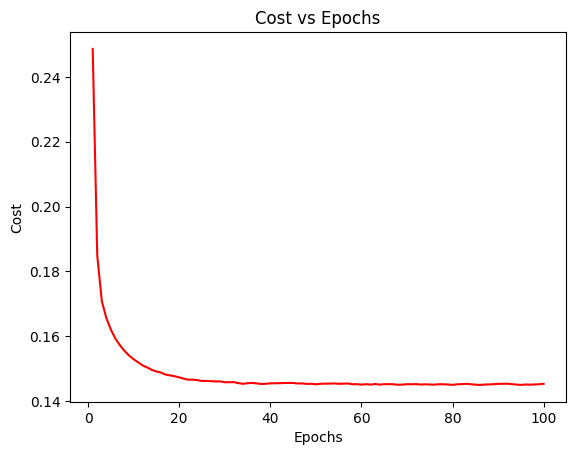

Training acc: 93.51904761904763
Testing acc: 93.46666666666667


In [8]:
model2 = LogisticRegression(20, alpha=3e-3,reg_param=0.1, epochs=100)
model2.thresh = 0.45
model2.train(x_train, y_train, details=False, plot_costs=True, get_report=True, print_con_mat=True)
print(f"Training acc: {model2.get_accuracy(y_train, model2.predict(x_train))}")
print(f"Testing acc: {model2.get_accuracy(y_test, model2.predict(x_test))}")